In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import test and train data
train = pd.read_excel('file:///C:/Users/Final_Train.xlsx')
test = pd.read_excel('file:///C:/Users/Final_Test.xlsx')

In [3]:
#combine both train and test data sets
train['Source'] = 'train'
test['Source'] = 'test'

In [4]:
train_df = pd.concat([train,test], ignore_index = True, sort = False)

In [5]:
train_df[train_df['Source'] == 'test']['Fees'].unique()

array([nan])

In [6]:
train_df.tail()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Source
7943,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN,NaN,test
7944,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN,NaN,test
7945,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN,NaN,test
7946,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,NaN,test
7947,"MBBS, MD - Dermatology , Venereology & Leprosy",8 years experience,NaN,"Pallikaranai, Chennai",Dermatologists,"1 Feedback Pallikaranai, Chennai ₹500",NaN,test


In [7]:
print('Train data size: ', train.shape)
print('Test data size: ' ,test.shape)
print('Train and Test data size: ', train_df.shape)

Train data size:  (5961, 8)
Test data size:  (1987, 7)
Train and Test data size:  (7948, 8)


In [8]:
#explore data
train_df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Source
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,train
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,train
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,train
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,train
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,train


In [9]:
#Let's extract exp numbers from experience column
train_df['Years_Of_Exp'] = train_df['Experience'].str.split()
train_df['Years_Of_Exp'] = train_df['Experience'].str[0].astype(int)

In [10]:
train_df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Source,Years_Of_Exp
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,train,2
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,train,1
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,train,9
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,train,1
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,train,2


In [11]:
#check if there are any null values
train_df['Years_Of_Exp'].isnull().values.any() #Exp column is free from null values

False

In [12]:
# check if Rating column is having null values
train_df['Rating'].isnull().values.any()  # it has null values

True

In [13]:
#check % of missing values in each column
train_df.isna().sum()/len(train_df)

Qualification         0.000000
Experience            0.000000
Rating                0.552592
Place                 0.003900
Profile               0.000000
Miscellaneous_Info    0.434575
Fees                  0.250000
Source                0.000000
Years_Of_Exp          0.000000
dtype: float64

In [14]:
#From above result missing values are more in 'Rating' column. For now just keep it in mind

In [15]:
#explore place column
train_df['Place'].head() # extract city and place into two columns

0             Kakkanad, Ernakulam
1           Whitefield, Bangalore
2      Mathikere - BEL, Bangalore
3    Bannerghatta Road, Bangalore
4           Keelkattalai, Chennai
Name: Place, dtype: object

In [16]:
# wherever NA is there fill it with UNKNOWN
train_df['Place'].fillna('Unknown,Unknown',inplace = True)

In [17]:
train_df['Place'].isna().any() #this column is free from null values

False

In [18]:
#let's split
train_df['Place'] = train_df['Place'].str.split(',')

In [19]:
train_df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Source,Years_Of_Exp
0,"BHMS, MD - Homeopathy",24 years experience,100%,"[Kakkanad, Ernakulam]",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,train,2
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"[Whitefield, Bangalore]",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,train,1
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"[Mathikere - BEL, Bangalore]",ENT Specialist,NaN,300.0,train,9
3,"BSc - Zoology, BAMS",12 years experience,NaN,"[Bannerghatta Road, Bangalore]",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,train,1
4,BAMS,20 years experience,100%,"[Keelkattalai, Chennai]",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,train,2


In [20]:
train_df['City'] = train_df['Place'].str[-1]
train_df['Place'] = train_df['Place'].str[0]

In [21]:
train_df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Source,Years_Of_Exp,City
0,"BHMS, MD - Homeopathy",24 years experience,100%,Kakkanad,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,train,2,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,Whitefield,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,train,1,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,Mathikere - BEL,ENT Specialist,NaN,300.0,train,9,Bangalore
3,"BSc - Zoology, BAMS",12 years experience,NaN,Bannerghatta Road,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,train,1,Bangalore
4,BAMS,20 years experience,100%,Keelkattalai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,train,2,Chennai


In [22]:
train_df.isna().any() # no null values in place and city and qualification columns

Qualification         False
Experience            False
Rating                 True
Place                 False
Profile               False
Miscellaneous_Info     True
Fees                   True
Source                False
Years_Of_Exp          False
City                  False
dtype: bool

In [23]:
# Let's explore Qualification column
train_df['Qualification'].nunique() #1420 unique values

1801

In [24]:
train_df['Qualification'].unique() #1420 unique values

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Medicine, Post Graduate Diploma in Diabetology (PGDD), MBBS, FRCP - Internal Medicine',
       'MBBS, MS - General Surgery, FAIS, FIAGES',
       'MBBS, MD / MS - Obstetrics & Gynaecology'], dtype=object)

In [25]:
train_df['Qual1'] = train_df['Qualification'].str.split(',').str[0]
train_df['Qual2'] = train_df['Qualification'].str.split(',').str[1]
train_df['Qual3'] = train_df['Qualification'].str.split(',').str[2]

In [26]:
train_df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Source,Years_Of_Exp,City,Qual1,Qual2,Qual3
0,"BHMS, MD - Homeopathy",24 years experience,100%,Kakkanad,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,train,2,Ernakulam,BHMS,MD - Homeopathy,NaN
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,Whitefield,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,train,1,Bangalore,BAMS,MD - Ayurveda Medicine,NaN
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,Mathikere - BEL,ENT Specialist,NaN,300.0,train,9,Bangalore,MBBS,MS - Otorhinolaryngology,NaN
3,"BSc - Zoology, BAMS",12 years experience,NaN,Bannerghatta Road,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,train,1,Bangalore,BSc - Zoology,BAMS,NaN
4,BAMS,20 years experience,100%,Keelkattalai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,train,2,Chennai,BAMS,NaN,NaN


In [27]:
train_df['Qual1'].isna().any() # no null values in 'Qual1' column so let's consider this as base for qualification

False

In [28]:
train_df['Qual1'] = train_df['Qual1'].str.split('-').str[0] 

In [29]:
#Let's remove spaces
train_df['Qual1'] = train_df['Qual1'].str.strip()

In [30]:
train_df['Qual1'].unique()

array(['BHMS', 'BAMS', 'MBBS', 'BSc', 'BDS', 'MDS',
       'Diploma in Dermatology', 'DM', 'MD',
       'Get inspired by remarkable stories of people like you', 'PhD',
       'MRCPS', 'MS', 'DDVL',
       'DHMS (Diploma in Homeopathic Medicine and Surgery)', 'GCEH',
       'Post Graduate Diploma in Healthcare Management(PGDHM)', 'DNB',
       'Certification in Aesthetic Dentistry',
       'Fellowship In Laryngology Bronchoesophagology', 'FAGE',
       'Fellowship in Aesthetic Medicine', 'BSAM',
       'Diploma in Family Medicine (DFM)', 'FNB',
       'Post Graduate Diploma in Dermotology (PGDD)',
       'Certificate of Oral Implantology', 'Certified In Panchkarma',
       '39 years experience', 'LCEH',
       'Doctor of Homeopathic Medicine (HMD)',
       'Diploma in Child Health (DCH)',
       'Diploma in Otorhinolaryngology (DLO)',
       'Diplomate of National Board Exam', 'MSc',
       'Fellowship and Diplomate in Implantology from ICOI (USA)',
       'Post Doctoral Fellowship in D

In [31]:
# From above 'Get inspired by remarkable stories of people like you' is not a specialty let's invistigate it and identify the specialty
train_df[train_df['Qual1'] == 'Get inspired by remarkable stories of people like you'].head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Source,Years_Of_Exp,City,Qual1,Qual2,Qual3
91,Get inspired by remarkable stories of people l...,0 years experience,NaN,Unknown,Dermatologists,NaN,100.0,train,0,Unknown,Get inspired by remarkable stories of people l...,NaN,NaN
502,Get inspired by remarkable stories of people l...,0 years experience,NaN,Unknown,Dermatologists,NaN,100.0,train,0,Unknown,Get inspired by remarkable stories of people l...,NaN,NaN
599,Get inspired by remarkable stories of people l...,0 years experience,NaN,Unknown,Dermatologists,NaN,100.0,train,0,Unknown,Get inspired by remarkable stories of people l...,NaN,NaN
605,Get inspired by remarkable stories of people l...,0 years experience,NaN,Unknown,Dermatologists,NaN,100.0,train,0,Unknown,Get inspired by remarkable stories of people l...,NaN,NaN
724,Get inspired by remarkable stories of people l...,0 years experience,NaN,Unknown,Dermatologists,NaN,100.0,train,0,Unknown,Get inspired by remarkable stories of people l...,NaN,NaN


In [32]:
#let's replace it with Profile 'Dermatologists' as Dermatology

In [33]:
train_df[train_df['Qual1'] == '39 years experience']

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Source,Years_Of_Exp,City,Qual1,Qual2,Qual3
753,39 years experience,39 years experience,NaN,Lajpat Nagar,General Medicine,NaN,300.0,train,3,Delhi,39 years experience,NaN,NaN


In [34]:
#Let's define a function for qualification

def spcl(spcl):
    if spcl== 'Diploma in Dermatology':
        return 'Dermatology'
    elif spcl == 'Get inspired by remarkable stories of people like you':
        return 'Dermatology'
    elif spcl == 'DHMS (Diploma in Homeopathic Medicine and Surgery)':
        return 'DHMS'
    elif spcl == 'D.H.M':
        return 'DHMS'
    elif spcl == 'Post Graduate Diploma in Healthcare Management(PGDHM)':
        return 'PGDHM'
    elif spcl == '39 years experience':
        return 'General Medicine'
    elif spcl == 'Post Graduate Diploma in Dermotology (PGDD)':
        return 'Dermatology'
    elif spcl == 'M. D. Hom. (Practice of Medicine)':
        return 'MD'
    elif spcl == 'B.Sc':
        return 'BSc'    
    elif spcl == 'M.D. (E.H)':
        return 'MD'
    else:
        return spcl
    
    
    

In [35]:
# Apply above function
train_df['Qual1'] = train_df['Qual1'].apply(spcl)

In [36]:
train_df[train_df['Qual1'] == 'Get inspired by remarkable stories of people like you'].head() # no rows it correct

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Source,Years_Of_Exp,City,Qual1,Qual2,Qual3


In [37]:
train_df['Qual1'].nunique()

106

In [38]:
#Let's perform OneHotEncoding on Qualification column
########################  One - Hot Encoding of Qual1 feature #############################

train_qual1_feature_onehotencoding = pd.get_dummies(train_df['Qual1'],sparse = False)


In [39]:
train_qual1_feature_onehotencoding.head()#join this back to original dataframe

,Advanced Certificate Course in Aesthetic Dentistry,Ayurvedic panchkarma,B.Ac,BAMS,BDS,BEMS,BHMS,BIMS,BPTh/BPT,BSAM,...,POST GRADUATE IN HOMOEOPATHY,PhD,Post Doctoral Fellowship in Diabetology,Post Graduate Certificate in Endodontics (PGCE),Post Graduate Diploma in Diabetic Education,Post Graduate Diploma in Diabetology (PGDD),Post Graduate Diploma in Diabetology (PGDD)(Madras Medical College),Post Graduate Diploma in Periodontics and Implantology,Post MD SR AIIMS,Training in Facial Aesthetics
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
type(train_qual1_feature_onehotencoding)

pandas.core.frame.DataFrame

In [41]:
train_df = pd.concat([train_df,train_qual1_feature_onehotencoding],axis = 1)

In [42]:
train_df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Source,Years_Of_Exp,City,...,POST GRADUATE IN HOMOEOPATHY,PhD,Post Doctoral Fellowship in Diabetology,Post Graduate Certificate in Endodontics (PGCE),Post Graduate Diploma in Diabetic Education,Post Graduate Diploma in Diabetology (PGDD),Post Graduate Diploma in Diabetology (PGDD)(Madras Medical College),Post Graduate Diploma in Periodontics and Implantology,Post MD SR AIIMS,Training in Facial Aesthetics
0,"BHMS, MD - Homeopathy",24 years experience,100%,Kakkanad,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,train,2,Ernakulam,...,0,0,0,0,0,0,0,0,0,0
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,Whitefield,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,train,1,Bangalore,...,0,0,0,0,0,0,0,0,0,0
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,Mathikere - BEL,ENT Specialist,NaN,300.0,train,9,Bangalore,...,0,0,0,0,0,0,0,0,0,0
3,"BSc - Zoology, BAMS",12 years experience,NaN,Bannerghatta Road,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,train,1,Bangalore,...,0,0,0,0,0,0,0,0,0,0
4,BAMS,20 years experience,100%,Keelkattalai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,train,2,Chennai,...,0,0,0,0,0,0,0,0,0,0


In [43]:
train_df['Rating'].unique()

array(['100%', '98%', nan, '99%', '79%', '95%', '97%', '94%', '88%',
       '90%', '80%', '93%', '36%', '78%', '87%', '96%', '82%', '89%',
       '74%', '86%', '92%', '83%', '76%', '85%', '56%', '91%', '68%',
       '60%', '75%', '69%', '73%', '67%', '77%', '33%', '55%', '71%',
       '84%', '45%', '63%', '72%', '81%', '62%', '57%', '7%', '48%',
       '40%', '70%', '64%', '65%', '47%', '58%', '53%', '52%'],
      dtype=object)

In [44]:
# Let's work on rating column. 
# As we know rating column has more null values so let's replace it with some dummay number say -99%
train_df['Rating']=train_df['Rating'].str.split('%').str[0]

In [45]:
train_df['Rating'].fillna(-99,inplace=True)

In [46]:
# convert rating data type to int
train_df['Rating'] = train_df['Rating'].astype(int)

In [47]:
train_df['Rating'].unique()

array([100,  98, -99,  99,  79,  95,  97,  94,  88,  90,  80,  93,  36,
        78,  87,  96,  82,  89,  74,  86,  92,  83,  76,  85,  56,  91,
        68,  60,  75,  69,  73,  67,  77,  33,  55,  71,  84,  45,  63,
        72,  81,  62,  57,   7,  48,  40,  70,  64,  65,  47,  58,  53,
        52], dtype=int64)

In [48]:
# Now get average rating 
train_qrate = pd.DataFrame(train_df['Qual1'])
train_qrate['Rating'] = pd.DataFrame(train_df['Rating'])

In [49]:
train_qrate.columns

Index(['Qual1', 'Rating'], dtype='object')

In [50]:
# replace -99 with 0 and take mean by qualification

train_qrate['Rating'].replace(-99,0, inplace = True)
    

In [51]:
# now check for unique values
train_qrate['Rating'].unique()

array([100,  98,   0,  99,  79,  95,  97,  94,  88,  90,  80,  93,  36,
        78,  87,  96,  82,  89,  74,  86,  92,  83,  76,  85,  56,  91,
        68,  60,  75,  69,  73,  67,  77,  33,  55,  71,  84,  45,  63,
        72,  81,  62,  57,   7,  48,  40,  70,  64,  65,  47,  58,  53,
        52], dtype=int64)

In [52]:
 # now calculate mean rating by each specialty
train_qrate_mean = pd.DataFrame(train_qrate.groupby('Qual1').mean())

In [53]:
train_qrate_mean.rename(columns = {'Rating':'New_Rating'},inplace = True)#rename rating column

In [54]:
train_qrate_mean.head()

,New_Rating
Qual1,
Advanced Certificate Course in Aesthetic Dentistry,0.000000
Ayurvedic panchkarma,0.000000
B.Ac,0.000000
BAMS,22.891374
BDS,62.534516


In [55]:
#let's replace null values in rating column with above column
train_df = pd.merge(train_df,train_qrate_mean,on = 'Qual1',how = 'left')

In [56]:
train_df.shape 

(7948, 120)

In [57]:
#Now wherever rating = -99 then replace it with 'New Rating'

train_df['final_rating'] = np.where(train_df.Rating == -99,train_df.New_Rating,train_df.Rating)

In [58]:
train_df[train_df['final_rating']==0]['Rating'].count()/len(train_df) #now only ~8% data has 0 rating

0.00805234021137393

In [59]:
# Now drop all unwanted columns from dataframe

train_df.drop(columns = {'Qual2','Qual3','Rating','New_Rating','Miscellaneous_Info','Experience','Qualification'},inplace = True)



In [60]:
train_df.columns

Index(['Place', 'Profile', 'Fees', 'Source', 'Years_Of_Exp', 'City', 'Qual1',
       'Advanced Certificate Course in Aesthetic Dentistry',
       'Ayurvedic panchkarma', 'B.Ac',
       ...
       'PhD', 'Post Doctoral Fellowship in Diabetology',
       'Post Graduate Certificate in Endodontics (PGCE)',
       'Post Graduate Diploma in Diabetic Education',
       'Post Graduate Diploma in Diabetology (PGDD)',
       'Post Graduate Diploma in Diabetology (PGDD)(Madras Medical College)',
       'Post Graduate Diploma in Periodontics and Implantology',
       'Post MD SR AIIMS', 'Training in Facial Aesthetics', 'final_rating'],
      dtype='object', length=114)

In [61]:
train_df['Profile'].isnull().any() # Profile column is perfect

False

In [62]:
# Let's perform label encoding over city and profile columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [63]:
train_df['City_label'] = le.fit_transform(train_df['City'])
train_df['Profile_label'] = le.fit_transform(train_df['Profile'])

In [64]:
train_df.head()

,Place,Profile,Fees,Source,Years_Of_Exp,City,Qual1,Advanced Certificate Course in Aesthetic Dentistry,Ayurvedic panchkarma,B.Ac,...,Post Graduate Certificate in Endodontics (PGCE),Post Graduate Diploma in Diabetic Education,Post Graduate Diploma in Diabetology (PGDD),Post Graduate Diploma in Diabetology (PGDD)(Madras Medical College),Post Graduate Diploma in Periodontics and Implantology,Post MD SR AIIMS,Training in Facial Aesthetics,final_rating,City_label,Profile_label
0,Kakkanad,Homeopath,100.0,train,2,Ernakulam,BHMS,0,0,0,...,0,0,0,0,0,0,0,100.000000,4,5
1,Whitefield,Ayurveda,350.0,train,1,Bangalore,BAMS,0,0,0,...,0,0,0,0,0,0,0,98.000000,0,0
2,Mathikere - BEL,ENT Specialist,300.0,train,9,Bangalore,MBBS,0,0,0,...,0,0,0,0,0,0,0,41.581044,0,3
3,Bannerghatta Road,Ayurveda,250.0,train,1,Bangalore,BSc,0,0,0,...,0,0,0,0,0,0,0,23.750000,0,0
4,Keelkattalai,Ayurveda,250.0,train,2,Chennai,BAMS,0,0,0,...,0,0,0,0,0,0,0,100.000000,1,0


In [65]:
# Exporting data
train_data = train_df[train_df['Source']=='train']
test_data = train_df[train_df['Source']=='test']

In [66]:
print('train data shape: ',train_data.shape)
print('test data shape: ',test_data.shape)

train data shape:  (5961, 116)
test data shape:  (1987, 116)


In [67]:
#drop unnecessary columns
train_data.drop(columns= {'Profile','Source','Place','City','Qual1'},inplace = True)
test_data.drop(columns= {'Profile','Source','Place','City','Fees','Qual1'},inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [68]:
print('train data shape: ',train_data.shape)
print('test data shape: ',test_data.shape)

train data shape:  (5961, 111)
test data shape:  (1987, 110)


In [69]:
train_data.head()

,Fees,Years_Of_Exp,Advanced Certificate Course in Aesthetic Dentistry,Ayurvedic panchkarma,B.Ac,BAMS,BDS,BEMS,BHMS,BIMS,...,Post Graduate Certificate in Endodontics (PGCE),Post Graduate Diploma in Diabetic Education,Post Graduate Diploma in Diabetology (PGDD),Post Graduate Diploma in Diabetology (PGDD)(Madras Medical College),Post Graduate Diploma in Periodontics and Implantology,Post MD SR AIIMS,Training in Facial Aesthetics,final_rating,City_label,Profile_label
0,100.0,2,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,100.000000,4,5
1,350.0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,98.000000,0,0
2,300.0,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,41.581044,0,3
3,250.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,23.750000,0,0
4,250.0,2,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,100.000000,1,0


In [70]:
#check data types of columns
train_data.dtypes.value_counts() # clear that there are no category/text columns

uint8      106
int64        2
float64      2
int32        1
dtype: int64

In [71]:
# Let's build models
# Linear Regression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [72]:
train_target = train_data['Fees']
train_predictors = train_data.drop(columns = {'Fees'})

In [73]:
train_target.head()

0    100.0
1    350.0
2    300.0
3    250.0
4    250.0
Name: Fees, dtype: float64

In [74]:
train_predictors.head()

,Years_Of_Exp,Advanced Certificate Course in Aesthetic Dentistry,Ayurvedic panchkarma,B.Ac,BAMS,BDS,BEMS,BHMS,BIMS,BPTh/BPT,...,Post Graduate Certificate in Endodontics (PGCE),Post Graduate Diploma in Diabetic Education,Post Graduate Diploma in Diabetology (PGDD),Post Graduate Diploma in Diabetology (PGDD)(Madras Medical College),Post Graduate Diploma in Periodontics and Implantology,Post MD SR AIIMS,Training in Facial Aesthetics,final_rating,City_label,Profile_label
0,2,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,100.000000,4,5
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,98.000000,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,41.581044,0,3
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,23.750000,0,0
4,2,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,100.000000,1,0


In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x_train , x_test,y_train,y_test  = train_test_split(train_predictors , train_target,test_size = 0.2, random_state =2)

In [77]:
x_train.shape

(4768, 110)

In [78]:
x_test.shape

(1193, 110)

In [79]:
y_train.shape

(4768,)

In [80]:
y_test.shape

(1193,)

In [81]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(normalize = True)

In [82]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [83]:
#make predictions on cv dataset(x_test dataset)
fee_y_predictions = reg.predict(x_test)
#the coeffiecients
#print('Coefficients: \n', reg.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, fee_y_predictions))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, fee_y_predictions))


Mean squared error: 217253054715853264377420456132608.00
Variance score: -6281325867447777318609616896.00


In [84]:
reg.score(x_test,y_test)

-6.281325867447777e+27

In [85]:
# Let's build Lasso Regression
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import GridSearchCV

In [86]:
# defining parameters for GridSearch CV
alphas = [0.0001,0.001,0.01,1,10]
normalize = [True]
param_grid = {'alpha': alphas,'normalize':normalize}


In [87]:
# Implementing GridSearchCV on Lasso Regression
Lasso_reg = Lasso()
Lasso_GS = GridSearchCV(estimator = Lasso_reg,param_grid=param_grid,cv = 10)
#Fit the lasso regression on train and test datasets to find best parameters
Lasso_GS.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

GridSearchCV(cv=10, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 1, 10], 'normalize': [True]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [88]:
Lasso_GS.best_estimator_  # From below best estimator is "0.01"

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [89]:
# Implementing the best estimatore '0.01' on train data and test sets
Lasso_best = Lasso(alpha = 0.01, normalize = True)
Lasso_best.fit(x_train,y_train)
y_pred_lasso = Lasso_best.predict(x_test)

In [90]:
y_pred_lasso  # seeing y_predictions

array([320.09271275, 253.93309418, 324.53081031, ..., 282.86470515,
       189.27441305, 236.11142934])

In [91]:
print("Best parameters: ",Lasso_GS.best_params_) # printing best parameters

Best parameters:  {'alpha': 0.01, 'normalize': True}


In [92]:
# importing metrics from sklearn
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

In [93]:
# printing all metrics based on test dataset
print("mean_squared_error: ",mean_squared_error(y_test,y_pred_lasso))
print("explained_variance_score: ",explained_variance_score(y_test,y_pred_lasso))
print("mean_absolute_error: ",mean_absolute_error(y_test,y_pred_lasso))
print("mean_squared_log_error: ",mean_squared_log_error(y_test,y_pred_lasso))
print("Coefficient of Determination(r2_score): ",r2_score(y_test,y_pred_lasso))
print("\nComparing with Linear Regression Lasso Regression is better",)

mean_squared_error:  30263.306320123625
explained_variance_score:  0.12502667847358173
mean_absolute_error:  140.87458438897917
mean_squared_log_error:  0.42901973186829456
Coefficient of Determination(r2_score):  0.1250125846482888

Comparing with Linear Regression Lasso Regression is better


In [94]:
# Let's perform Ridge Regression

# Implementing GridSearchCV on Ridge Regression
Ridge_Reg = Ridge()
Ridge_GS = GridSearchCV(estimator = Ridge_Reg,param_grid=param_grid,cv = 10)
#Fit the Ridge regression on train and test datasets to find best parameters
Ridge_GS.fit(x_train, y_train)


GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 1, 10], 'normalize': [True]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [95]:
Ridge_GS.best_estimator_

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [96]:
Ridge_GS.best_params_

{'alpha': 0.01, 'normalize': True}

In [97]:
# Implement Ridge Regression with "Alpha : 0.01" and normalize = True

Ridge_best = Ridge(alpha = 0.01, normalize = True)
Ridge_best.fit(x_train,y_train)
y_pred_ridge = Ridge_best.predict(x_test)

In [98]:
r2_score(y_test,y_pred_ridge)

0.12348278790221212

In [99]:
# printing all metrics based on test dataset
print("mean_squared_error: ",mean_squared_error(y_test,y_pred_ridge))
print("explained_variance_score: ",explained_variance_score(y_test,y_pred_ridge))
print("mean_absolute_error: ",mean_absolute_error(y_test,y_pred_ridge))
print("mean_squared_log_error: ",mean_squared_log_error(y_test,y_pred_ridge))
print("Coefficient of Determination(r2_score): ",r2_score(y_test,y_pred_ridge))
print("\nComparing Lasso Regression & Ridge Regression both gave us the same result",)

mean_squared_error:  30316.217604013844
explained_variance_score:  0.12348356246137138
mean_absolute_error:  140.74859296725265
mean_squared_log_error:  0.42950791598362903
Coefficient of Determination(r2_score):  0.12348278790221212

Comparing Lasso Regression & Ridge Regression both gave us the same result


In [100]:
# Let's check the distribution of the target variable
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
y_train = pd.DataFrame(y_train)

In [102]:
y_train.head()

,Fees
2288,500.0
3728,800.0
3665,200.0
5392,300.0
3975,100.0


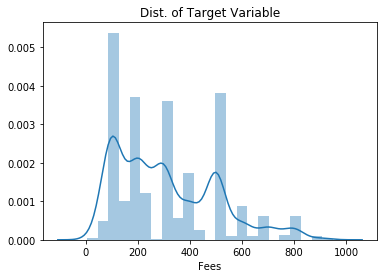

In [103]:
sns.distplot(y_train, label = 'Fees',hist = True)
plt.title('Dist. of Target Variable')
plt.xlabel('Fees')
plt.show()

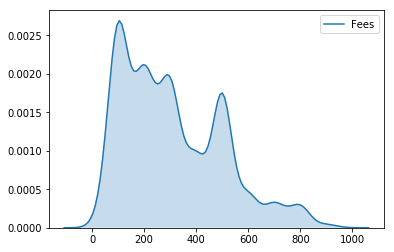

In [104]:
sns.kdeplot(y_train['Fees'],shade = True) # From below and above plot it is clear that data is right skewed. Let's do log transformation of data

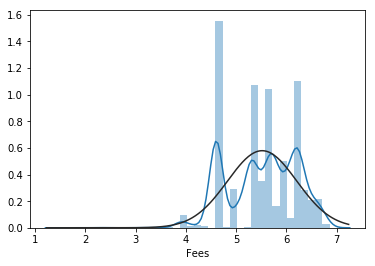

In [105]:
#Check the new distribution 
from scipy.stats import norm, skew 
sns.distplot(np.log(y_train["Fees"]) , fit=norm);

In [106]:
# Apply log transformation to the y_train(target variable) and y_test
y_train1 = pd.DataFrame(np.log(y_train['Fees']))


In [107]:
y_train1.head()

,Fees
2288,6.214608
3728,6.684612
3665,5.298317
5392,5.703782
3975,4.605170


In [108]:
y_test1 = np.log(y_test)

In [109]:
y_test1.head()

5117    6.396930
3924    6.214608
5249    6.684612
3501    5.298317
1852    5.857933
Name: Fees, dtype: float64

In [110]:
# Let's perform Lasso and Ridge Regression

################################  Ridge #######################################
# Implementing GridSearchCV on Ridge Regression
Ridge_Reg = Ridge()
Ridge_GS = GridSearchCV(estimator = Ridge_Reg,param_grid=param_grid,cv = 10)
#Fit the Ridge regression on train and test datasets to find best parameters
Ridge_GS.fit(x_train, y_train1)

################################  Lasso #######################################
Lasso_reg = Lasso()
Lasso_GS = GridSearchCV(estimator = Lasso_reg,param_grid=param_grid,cv = 10)
#Fit the lasso regression on train and test datasets to find best parameters
Lasso_GS.fit(x_train, y_train1)


GridSearchCV(cv=10, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 1, 10], 'normalize': [True]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [111]:
Ridge_GS.best_estimator_

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [112]:
Ridge_GS.best_params_

{'alpha': 0.01, 'normalize': True}

In [113]:
Ridge_reg = Ridge(alpha = 0.01, normalize = True)
Ridge_reg.fit(x_train,y_train1)
y_pred_rg = Ridge_reg.predict(x_test)

In [114]:
# printing all metrics based on test dataset
print("mean_squared_error: ",mean_squared_error(y_test1,y_pred_rg))
print("explained_variance_score: ",explained_variance_score(y_test1,y_pred_rg))
print("mean_absolute_error: ",mean_absolute_error(y_test1,y_pred_rg))
print("mean_squared_log_error: ",mean_squared_log_error(y_test1,y_pred_rg))
print("Coefficient of Determination(r2_score): ",r2_score(y_test1,y_pred_rg))
print("\nComparing Lasso Regression & Ridge Regression both gave us the same result",)

mean_squared_error:  0.4011654652220725
explained_variance_score:  0.1049235011449593
mean_absolute_error:  0.5235560395196022
mean_squared_log_error:  0.009925198131997015
Coefficient of Determination(r2_score):  0.10480846191168058

Comparing Lasso Regression & Ridge Regression both gave us the same result


In [115]:
print("Best estimator: ",Lasso_GS.best_estimator_)
print("Best Parameters: ",Lasso_GS.best_params_)

Best estimator:  Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
Best Parameters:  {'alpha': 0.0001, 'normalize': True}


In [116]:
Lasso_reg = Lasso(alpha = 0.0001, normalize = True)
Lasso_reg.fit(x_train,y_train1)
y_pred_la = Lasso_reg.predict(x_test)

In [117]:
# Identifying coeffiecients
Lasso_coef = pd.DataFrame(Lasso_reg.coef_,index = x_train.columns,columns = ['Coefficient']) #getting all into a dataframe
#get only non zero coeffiecients
best_lasso_coef = Lasso_coef[np.round(Lasso_coef['Coefficient'],decimals = 3)!= 0].sort_values(ascending = False,by ='Coefficient' )

In [118]:
best_lasso_coef.index

Index(['MA', 'MSc', 'Fellowship In Laryngology Bronchoesophagology',
       'Cochlear Implant Surgery', 'MRCP (UK)', 'PGDHM', 'MPH',
       'Post Graduate Diploma in Diabetic Education', 'M.Ch',
       'Fellowship in Aesthetic Medicine', 'Diploma in Trichology', 'FRCP',
       'BIMS', 'Post MD SR AIIMS', 'FRGUHS',
       'Certification Course In Diabetes', 'DNB', 'DM', 'Ayurvedic panchkarma',
       'MS', 'Diplomate of National Board Exam',
       'Diploma in Diet and Nutrition', 'DHMS', 'MBBS', 'MD',
       'POST GRADUATE IN HOMOEOPATHY', 'final_rating',
       'Certificate of Oral Implantology', 'Years_Of_Exp', 'City_label',
       'Profile_label', 'GCEH', 'DDV', 'MRCPCH (UK)',
       'Advanced Certificate Course in Aesthetic Dentistry', 'G.A.M.S',
       'Post Graduate Diploma in Diabetology (PGDD)', 'BSAM', 'MDS', 'BAMS',
       'BSc', 'BDS', 'Dermatology', 'MRCPS', 'DVD'],
      dtype='object')

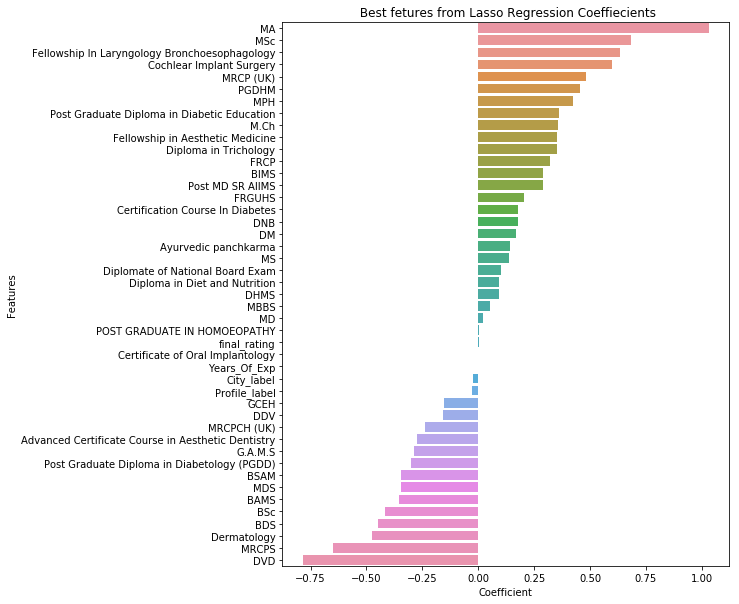

In [119]:
plt.figure(figsize = (8,10))
sns.barplot('Coefficient',best_lasso_coef.index,data = best_lasso_coef)
plt.title(" Best fetures from Lasso Regression Coeffiecients")
plt.xlabel("Coefficient")
plt.ylabel("Features")
plt.show()

In [120]:
# printing all metrics based on test dataset
print("mean_squared_error: ",mean_squared_error(y_test1,y_pred_la))
print("explained_variance_score: ",explained_variance_score(y_test1,y_pred_la))
print("mean_absolute_error: ",mean_absolute_error(y_test1,y_pred_la))
print("mean_squared_log_error: ",mean_squared_log_error(y_test1,y_pred_la))
print("Coefficient of Determination(r2_score): ",r2_score(y_test1,y_pred_la))
print("\nComparing Lasso Regression & Ridge Regression both gave us the same result",)

mean_squared_error:  0.3995117716373063
explained_variance_score:  0.10855477484840359
mean_absolute_error:  0.5245112339042578
mean_squared_log_error:  0.009888403603062151
Coefficient of Determination(r2_score):  0.10849864123171293

Comparing Lasso Regression & Ridge Regression both gave us the same result


In [121]:
# Let's build a baseline model of random forest regressor without parameter tuning
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(random_state=0,n_estimators=100)
regr.fit(np.array(x_train),y_train1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [122]:
regr.feature_importances_

array([2.15300219e-01, 1.53395238e-04, 9.23067781e-05, 0.00000000e+00,
       8.89321043e-03, 7.50838842e-03, 1.73812549e-04, 8.92664993e-03,
       2.59726861e-04, 0.00000000e+00, 2.20225607e-04, 3.29716215e-03,
       0.00000000e+00, 0.00000000e+00, 8.70886682e-05, 2.17067174e-05,
       1.52486808e-04, 2.21654758e-05, 0.00000000e+00, 1.01396806e-04,
       4.67087717e-05, 1.33975328e-03, 2.56775818e-03, 0.00000000e+00,
       1.19193332e-04, 4.25592745e-03, 1.26924212e-04, 0.00000000e+00,
       4.99054233e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.95164114e-03, 3.69980193e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.69488896e-05, 1.82177868e-04, 0.00000000e+00,
       2.86634557e-05, 0.00000000e+00, 4.97563821e-05, 1.26130660e-04,
       1.47582141e-03, 0.00000000e+00, 3.21655725e-04, 3.90428115e-05,
       1.65993078e-05, 0.00000000e+00, 4.62109390e-05, 0.00000000e+00,
       8.47380079e-04, 2.54980063e-04, 0.00000000e+00, 0.00000000e+00,
      

In [123]:
from sklearn.metrics import r2_score

In [124]:
# There is not much difference in accuracy between base random model and tuned random model

In [125]:
# Let's try with Random Search
# Let's do hyperparameter tuning for Random Forest Regressor

# N_Estimators ------identifying max number of trees using Grid Search
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in Random Forest
n_estimators = [int(i) for i in np.linspace(start = 100, stop = 2000,num = 10)]

# Number of features to consider at each step
max_features = ['auto','sqrt']

# Maximum number of levels in tree
#max_depth = (int(i) for i in np.linspace(start = 10, stop = 500, num = 10))
#max_depth.append(None)
max_depth = [None]

# Minimum number of samples required to split a node
min_samples_split = [i for i in range(1,20,2)]

# Minimum number of samples required at each leaf node
min_samples_leaf = [i for i in range(1,16,2)]

# Method of selecting samples for training each tree
bootstrap = [True, False]


# Create parameter grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               }
print(param_grid)


{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [None], 'min_samples_split': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'min_samples_leaf': [1, 3, 5, 7, 9, 11, 13, 15], 'bootstrap': [True, False]}


In [126]:
# initiate Random Search
# Initiate Grid Search CV and fit it
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, cv = 5, verbose=2, n_jobs = -1,random_state=42)
# Fit the random search model
rf_random.fit(x_train, y_train1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.8min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [None], 'min_samples_split': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'min_samples_leaf': [1, 3, 5, 7, 9, 11, 13, 15], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [127]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=1366, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [128]:
rf_random.best_params_

{'n_estimators': 1366,
 'min_samples_split': 13,
 'min_samples_leaf': 9,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [129]:
def evaluate(model, x_test, y_test):
    y_pred = model.predict(x_test)
    errors = abs(y_pred - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    r2= r2_score(y_test,y_pred)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print('Coeffiecient of Determination = {:0.2f}%.'.format(r2))
    
    return accuracy

base_model = RandomForestRegressor(n_estimators = 100, random_state = 0)
base_model.fit(x_train, y_train)
base_accuracy = evaluate(base_model, x_test, y_test)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Model Performance
Average Error: 143.2642 degrees.
Accuracy = 25.09%.
Coeffiecient of Determination = 0.00%.


In [130]:
best_model = RandomForestRegressor(n_estimators = 1366, random_state = None,min_samples_leaf=9,min_samples_split=13)
best_model.fit(x_train, y_train1)
best_accuracy = evaluate(best_model, x_test, y_test1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Model Performance
Average Error: 0.4901 degrees.
Accuracy = 90.77%.
Coeffiecient of Determination = 0.16%.


In [131]:
# Let's find all metrics
y_pred1 = best_model.predict(x_test)
print("Coeffiecient of Determination       : ",r2_score(y_test1,y_pred1))
print("Mean Absolute Error(MAE)            : ",mean_absolute_error(y_test1,y_pred1))
print("Mean Absolute Percentage Error(MAPE): ",100*np.mean(mean_absolute_error(y_test1,y_pred1)/y_test1))
print("Mean Squared Error(MSE)             : ",mean_squared_error(y_test1,y_pred1))
print("Root Mean Squared Error(RMSE)       : ",np.sqrt(mean_squared_error(y_test1,y_pred1)))
print("Accuracy                            : ",100-100*np.mean(mean_absolute_error(y_test1,y_pred1)/y_test1))
print("Mean Squared Log Error              : ",mean_squared_log_error(y_test1,y_pred1))
print("Root Mean Squared Log Error         : ",np.sqrt(mean_squared_log_error(y_test1,y_pred1)))

Coeffiecient of Determination       :  0.16094722834125585
Mean Absolute Error(MAE)            :  0.4900773925988771
Mean Absolute Percentage Error(MAPE):  9.018147027482714
Mean Squared Error(MSE)             :  0.37600779404947937
Root Mean Squared Error(RMSE)       :  0.613194743983899
Accuracy                            :  90.98185297251729
Mean Squared Log Error              :  0.009283536672478283
Root Mean Squared Log Error         :  0.09635111142316047


In [132]:
feature_importances = pd.DataFrame(best_model.feature_importances_, index = x_train.columns,columns = ['Importance'],)

In [133]:
feature_importances.head()

,Importance
Years_Of_Exp,0.162302
Advanced Certificate Course in Aesthetic Dentistry,0.000000
Ayurvedic panchkarma,0.000000
B.Ac,0.000000
BAMS,0.012116


In [134]:
# Let's sort the data frame
feature_importances.sort_values(by = 'Importance',ascending = False, inplace = True)

In [135]:
feature_importances.head()

,Importance
Profile_label,0.291044
City_label,0.275327
final_rating,0.226465
Years_Of_Exp,0.162302
MBBS,0.013039


In [136]:
 # Since there are more features it is difficult to check

In [137]:
# Let's plot the barplot only for features where their importance is not equal to zero.
feature_importances['Importance']=np.round(feature_importances['Importance'],decimals = 3)

# Now limit to the features where their importance is not equal to zero
best_features = feature_importances[feature_importances['Importance'] != 0]

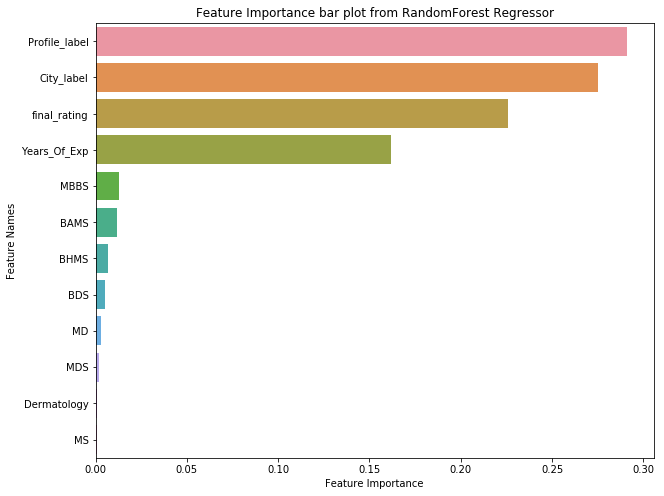

In [138]:
# Bar plot for best features
plt.figure(figsize = (10,8))
sns.barplot('Importance',best_features.index,data = best_features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Feature Importance bar plot from RandomForest Regressor')
plt.show()

In [139]:
best_features.index

Index(['Profile_label', 'City_label', 'final_rating', 'Years_Of_Exp', 'MBBS',
       'BAMS', 'BHMS', 'BDS', 'MD', 'MDS', 'Dermatology', 'MS'],
      dtype='object')

In [140]:
# Let's use best features we gor from RandomForest Regressor in Lasso Regression
x_train_df = x_train[['Profile_label','City_label', 'final_rating', 'Years_Of_Exp', 'MBBS','BAMS', 'BHMS', 'BDS', 'MD', 'MDS',
                      'Dermatology', 'MS']]
x_test_df = x_test[['Profile_label','City_label', 'final_rating', 'Years_Of_Exp', 'MBBS','BAMS', 'BHMS', 'BDS', 'MD', 'MDS',
                      'Dermatology', 'MS']]

In [141]:
###################      Lasso Regression ##############
Lasso_reg = Lasso(alpha = 0.0001, normalize = True)
Lasso_reg.fit(x_train_df,y_train1)
y_pred_la = Lasso_reg.predict(x_test_df)


In [142]:
print("Coeffiecient of Determination       : ",r2_score(y_test1,y_pred_la))
print("Mean Absolute Error(MAE)            : ",mean_absolute_error(y_test1,y_pred_la))
print("Mean Absolute Percentage Error(MAPE): ",100*np.mean(mean_absolute_error(y_test1,y_pred_la)/y_test1))
print("Mean Squared Error(MSE)             : ",mean_squared_error(y_test1,y_pred_la))
print("Root Mean Squared Error(RMSE)       : ",np.sqrt(mean_squared_error(y_test1,y_pred_la)))
print("Accuracy                            : ",100-100*np.mean(mean_absolute_error(y_test1,y_pred_la)/y_test1))
print("Mean Squared Log Error              : ",mean_squared_log_error(y_test1,y_pred_la))
print("Root Mean Squared Log Error(RMSLE)  : ",np.sqrt(mean_squared_log_error(y_test1,y_pred_la)))

Coeffiecient of Determination       :  0.1085267761313401
Mean Absolute Error(MAE)            :  0.5252286230358563
Mean Absolute Percentage Error(MAPE):  9.664981525594309
Mean Squared Error(MSE)             :  0.39949916344161
Root Mean Squared Error(RMSE)       :  0.6320594619508595
Accuracy                            :  90.33501847440569
Mean Squared Log Error              :  0.00988589256383367
Root Mean Squared Log Error(RMSLE)  :  0.099427825903183


In [143]:
# let's perform extra trees regressor
from sklearn.ensemble import ExtraTreesRegressor

In [144]:
# Gradient Boosting Regression
# Let's first fit a gradient boosting regressor with default parameters to get baseline performance of it and later we can tune it to improve the performance.
from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor()
gbm.fit(x_train,y_train)
gbm_pred = gbm.predict(x_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [145]:
print("Coeffiecient of Determination       : ",r2_score(y_test,gbm_pred))
print("Mean Absolute Error(MAE)            : ",mean_absolute_error(y_test,gbm_pred))
print("Mean Absolute Percentage Error(MAPE): ",100*np.mean(mean_absolute_error(y_test,gbm_pred)/y_test))
print("Mean Squared Error(MSE)             : ",mean_squared_error(y_test,gbm_pred))
print("Root Mean Squared Error(RMSE)       : ",np.sqrt(mean_squared_error(y_test,gbm_pred)))
print("Accuracy                            : ",100-100*np.mean(mean_absolute_error(y_test,gbm_pred)/y_test))
print("Mean Squared Log Error              : ",mean_squared_log_error(y_test,gbm_pred))
print("Root Mean Squared Log Error         : ",np.sqrt(mean_squared_log_error(y_test,gbm_pred)))

Coeffiecient of Determination       :  0.20420455497620582
Mean Absolute Error(MAE)            :  132.5923978196
Mean Absolute Percentage Error(MAPE):  66.784058211643
Mean Squared Error(MSE)             :  27524.283090670033
Root Mean Squared Error(RMSE)       :  165.90443963520093
Accuracy                            :  33.215941788357
Mean Squared Log Error              :  0.3897736186997985
Root Mean Squared Log Error         :  0.6243185234315881


In [146]:
# From above base GBM model with def. parameters coef. of determination : 0.20
# Let's do hyperparameter tuning

# Variables for hyperparameter tuning in "GBM": 
#    :learning_rate, max_features, max_depth, min_samples_split, min_samples_leaf, n_estimators

learning_rate = [1, 0.5, 0.25, 0.1, 0.05]  #defining learning rate values
n_estimators = [int(i) for i in np.linspace(start = 10, stop = 2000,num = 10)] #defining n_estimators(# base learners)
max_depth = [int(j) for j in range(1,200,20)]
min_samples_split = [int(k) for k in range(1,20,2)]
min_samples_leaf = [int(l) for l in range(1,20,2)]


param_grid = {
    
    "learning_rate":learning_rate,
    "n_estimators":n_estimators,
    "max_depth":max_depth,
    "min_samples_split":min_samples_split,
    "min_samples_leaf":min_samples_leaf            
}
print(param_grid)

{'learning_rate': [1, 0.5, 0.25, 0.1, 0.05], 'n_estimators': [10, 231, 452, 673, 894, 1115, 1336, 1557, 1778, 2000], 'max_depth': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181], 'min_samples_split': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'min_samples_leaf': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]}


In [147]:
# Initiate RandomisedSearchCV
%timeit
gbm = GradientBoostingRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
gbm_random = RandomizedSearchCV(estimator = gbm, param_distributions = param_grid, cv = 5, verbose=2, n_jobs = -1,random_state=42)
# Fit the random search model
gbm_result=gbm_random.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (gbm_result.best_score_, gbm_result.best_params_))
means = gbm_result.cv_results_['mean_test_score']
stds = gbm_result.cv_results_['std_test_score']
params = gbm_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

    

# plot results
#scores = np.array(means).reshape(len(learning_rate), len(n_estimators))
#for i, value in enumerate(learning_rate):
#    plt.plot(n_estimators, scores[i], label='learning_rate: ' + str(value))
#plt.legend()
#plt.xlabel('n_estimators')
#plt.ylabel('Squared Loss')
#plt.savefig('n_estimators_vs_learning_rate.png')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 10.0min


Best: 0.140991 using {'n_estimators': 10, 'min_samples_split': 13, 'min_samples_leaf': 17, 'max_depth': 1, 'learning_rate': 1}
-0.150559 (0.032120) with: {'n_estimators': 1115, 'min_samples_split': 19, 'min_samples_leaf': 15, 'max_depth': 101, 'learning_rate': 0.5}
0.140991 (0.009789) with: {'n_estimators': 10, 'min_samples_split': 13, 'min_samples_leaf': 17, 'max_depth': 1, 'learning_rate': 1}
-0.109587 (0.023647) with: {'n_estimators': 1778, 'min_samples_split': 11, 'min_samples_leaf': 3, 'max_depth': 161, 'learning_rate': 0.1}
0.037496 (0.028854) with: {'n_estimators': 452, 'min_samples_split': 7, 'min_samples_leaf': 15, 'max_depth': 81, 'learning_rate': 0.05}
-0.140575 (0.026289) with: {'n_estimators': 894, 'min_samples_split': 17, 'min_samples_leaf': 5, 'max_depth': 21, 'learning_rate': 0.5}
-0.196095 (0.032111) with: {'n_estimators': 1115, 'min_samples_split': 13, 'min_samples_leaf': 5, 'max_depth': 121, 'learning_rate': 1}
0.115044 (0.020936) with: {'n_estimators': 10, 'min_samp

[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 13.0min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [148]:
gbm_result.cv_results_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

{'mean_fit_time': array([ 88.10982189,   0.2189909 , 179.23390779,  28.87757034,
         69.1987052 ,  94.41232815,   0.62036877,  82.40113444,
         27.71052399,  18.16891079]),
 'std_fit_time': array([6.22621787, 0.02035385, 9.5506708 , 1.0081299 , 3.70325965,
        4.37075613, 0.01259243, 2.50492165, 1.33340622, 0.86686072]),
 'mean_score_time': array([0.37562504, 0.00243998, 0.68890524, 0.11045761, 0.26672311,
        0.38008904, 0.00261583, 0.31476359, 0.10008435, 0.0689889 ]),
 'std_score_time': array([0.08386198, 0.00190605, 0.06601438, 0.00972827, 0.03633952,
        0.04346592, 0.00345223, 0.04509165, 0.00794368, 0.00313651]),
 'param_n_estimators': masked_array(data=[1115, 10, 1778, 452, 894, 1115, 10, 894, 452, 231],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[19, 13, 11, 7, 17, 13, 11, 19, 13, 19],
      

In [149]:
pd.DataFrame.from_dict(params)

,learning_rate,max_depth,min_samples_leaf,min_samples_split,n_estimators
0,0.50,101,15,19,1115
1,1.00,1,17,13,10
2,0.10,161,3,11,1778
3,0.05,81,15,7,452
4,0.50,21,5,17,894
5,1.00,121,5,13,1115
6,0.50,121,17,11,10
7,0.10,141,3,19,894
8,0.25,21,19,13,452
9,0.05,141,3,19,231


In [150]:
pd.DataFrame(means)

,0
0,-0.150559
1,0.140991
2,-0.109587
3,0.037496
4,-0.140575
5,-0.196095
6,0.115044
7,-0.114583
8,-0.077537
9,-0.031778


In [151]:
cv_results = pd.concat([pd.DataFrame.from_dict(params),pd.DataFrame(means,columns = ['Mean_Test_Score'])],axis = 1)

In [152]:
cv_results

,learning_rate,max_depth,min_samples_leaf,min_samples_split,n_estimators,Mean_Test_Score
0,0.50,101,15,19,1115,-0.150559
1,1.00,1,17,13,10,0.140991
2,0.10,161,3,11,1778,-0.109587
3,0.05,81,15,7,452,0.037496
4,0.50,21,5,17,894,-0.140575
5,1.00,121,5,13,1115,-0.196095
6,0.50,121,17,11,10,0.115044
7,0.10,141,3,19,894,-0.114583
8,0.25,21,19,13,452,-0.077537
9,0.05,141,3,19,231,-0.031778


In [153]:
type(cv_results)

pandas.core.frame.DataFrame

In [154]:
cv_results

,learning_rate,max_depth,min_samples_leaf,min_samples_split,n_estimators,Mean_Test_Score
0,0.50,101,15,19,1115,-0.150559
1,1.00,1,17,13,10,0.140991
2,0.10,161,3,11,1778,-0.109587
3,0.05,81,15,7,452,0.037496
4,0.50,21,5,17,894,-0.140575
5,1.00,121,5,13,1115,-0.196095
6,0.50,121,17,11,10,0.115044
7,0.10,141,3,19,894,-0.114583
8,0.25,21,19,13,452,-0.077537
9,0.05,141,3,19,231,-0.031778


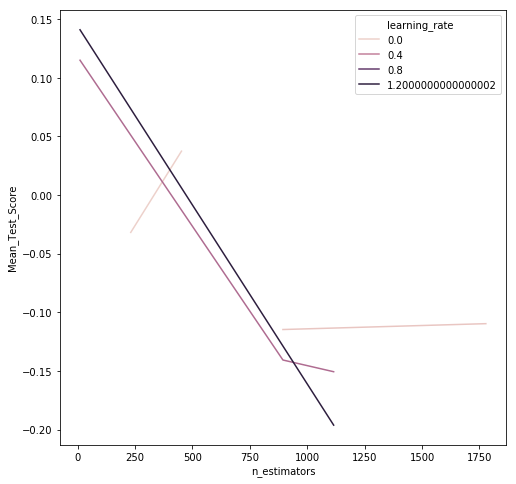

In [158]:
#sns.lmplot(x='n_estimators', y='Mean_Test_Score', hue='learning_rate', data=cv_results);
plt.figure(figsize = (8,8))
sns.lineplot('n_estimators','Mean_Test_Score',data=cv_results,hue = 'learning_rate')

In [161]:
###################      Gradient Boosting Regression ##############


gbm_reg = GradientBoostingRegressor(loss = 'ls',learning_rate = 1,n_estimators = 10,min_samples_split = 12, max_depth = 1,random_state = 42)
gbm_reg.fit(x_train,y_train)
gbm_y_pred = gbm_reg.predict(x_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [162]:
gbm_y_pred

array([293.38642842, 258.56871267, 361.47126638, ..., 310.63997567,
       322.68118531, 258.56871267])

In [170]:
x_train.columns

Index(['Years_Of_Exp', 'Advanced Certificate Course in Aesthetic Dentistry',
       'Ayurvedic panchkarma', 'B.Ac', 'BAMS', 'BDS', 'BEMS', 'BHMS', 'BIMS',
       'BPTh/BPT',
       ...
       'Post Graduate Certificate in Endodontics (PGCE)',
       'Post Graduate Diploma in Diabetic Education',
       'Post Graduate Diploma in Diabetology (PGDD)',
       'Post Graduate Diploma in Diabetology (PGDD)(Madras Medical College)',
       'Post Graduate Diploma in Periodontics and Implantology',
       'Post MD SR AIIMS', 'Training in Facial Aesthetics', 'final_rating',
       'City_label', 'Profile_label'],
      dtype='object', length=110)

In [171]:
x_train.head()

,Years_Of_Exp,Advanced Certificate Course in Aesthetic Dentistry,Ayurvedic panchkarma,B.Ac,BAMS,BDS,BEMS,BHMS,BIMS,BPTh/BPT,...,Post Graduate Certificate in Endodontics (PGCE),Post Graduate Diploma in Diabetic Education,Post Graduate Diploma in Diabetology (PGDD),Post Graduate Diploma in Diabetology (PGDD)(Madras Medical College),Post Graduate Diploma in Periodontics and Implantology,Post MD SR AIIMS,Training in Facial Aesthetics,final_rating,City_label,Profile_label
2288,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,89.000000,0,3
3728,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,41.581044,3,3
3665,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,82.000000,5,3
5392,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,96.000000,3,4
3975,5,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,100.000000,0,1


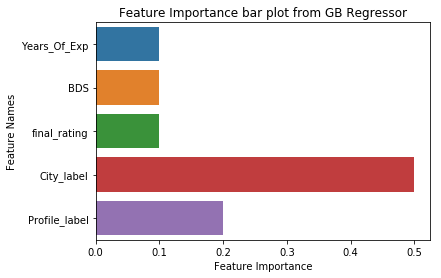

In [180]:
feature_importances = pd.DataFrame(gbm_reg.feature_importances_, index = x_train.columns,columns = ['Importance'],)
feature_importances['Importance']=np.round(feature_importances['Importance'],decimals = 3)
best_features = feature_importances[feature_importances['Importance'] != 0]

sns.barplot('Importance',best_features.index,data = best_features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Feature Importance bar plot from GB Regressor')
plt.show()


In [181]:

print("Coeffiecient of Determination       : ",r2_score(y_test,gbm_y_pred))
print("Mean Absolute Error(MAE)            : ",mean_absolute_error(y_test,gbm_y_pred))
print("Mean Absolute Percentage Error(MAPE): ",100*np.mean(mean_absolute_error(y_test,gbm_y_pred)/y_test))
print("Mean Squared Error(MSE)             : ",mean_squared_error(y_test,gbm_y_pred))
print("Root Mean Squared Error(RMSE)       : ",np.sqrt(mean_squared_error(y_test,gbm_y_pred)))
print("Accuracy                            : ",100-100*np.mean(mean_absolute_error(y_test,gbm_y_pred)/y_test))
print("Mean Squared Log Error              : ",mean_squared_log_error(y_test,gbm_y_pred))
print("Root Mean Squared Log Error         : ",np.sqrt(mean_squared_log_error(y_test,gbm_y_pred)))

Coeffiecient of Determination       :  0.16909680869980392
Mean Absolute Error(MAE)            :  136.7544581947904
Mean Absolute Percentage Error(MAPE):  68.88040224756074
Mean Squared Error(MSE)             :  28738.55938896954
Root Mean Squared Error(RMSE)       :  169.52450969983528
Accuracy                            :  31.11959775243926
Mean Squared Log Error              :  0.4117775049415216
Root Mean Squared Log Error         :  0.6416989207888085


In [188]:
#Let's restrict it only for important features
x_train1 = x_train[['Years_Of_Exp','BDS','final_rating','City_label','Profile_label']]
x_test1=x_test[['Years_Of_Exp','BDS','final_rating','City_label','Profile_label']]

In [185]:
x_train1.head()

,Years_Of_Exp,BDS,final_rating,City_label,Profile_label
2288,2,0,89.000000,0,3
3728,2,0,41.581044,3,3
3665,2,0,82.000000,5,3
5392,3,0,96.000000,3,4
3975,5,1,100.000000,0,1


In [189]:
#Let's build the model based upon these imp variables

gbm_reg = GradientBoostingRegressor(loss = 'ls',learning_rate = 1,n_estimators = 10,min_samples_split = 12, max_depth = 1,random_state = 42)
gbm_reg.fit(x_train1,y_train)
gbm_y_pred = gbm_reg.predict(x_test1)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [190]:
print("Coeffiecient of Determination       : ",r2_score(y_test,gbm_y_pred))
print("Mean Absolute Error(MAE)            : ",mean_absolute_error(y_test,gbm_y_pred))
print("Mean Absolute Percentage Error(MAPE): ",100*np.mean(mean_absolute_error(y_test,gbm_y_pred)/y_test))
print("Mean Squared Error(MSE)             : ",mean_squared_error(y_test,gbm_y_pred))
print("Root Mean Squared Error(RMSE)       : ",np.sqrt(mean_squared_error(y_test,gbm_y_pred)))
print("Accuracy                            : ",100-100*np.mean(mean_absolute_error(y_test,gbm_y_pred)/y_test))
print("Mean Squared Log Error              : ",mean_squared_log_error(y_test,gbm_y_pred))
print("Root Mean Squared Log Error         : ",np.sqrt(mean_squared_log_error(y_test,gbm_y_pred)))

Coeffiecient of Determination       :  0.16909680869980392
Mean Absolute Error(MAE)            :  136.75445819479035
Mean Absolute Percentage Error(MAPE):  68.88040224756065
Mean Squared Error(MSE)             :  28738.55938896954
Root Mean Squared Error(RMSE)       :  169.52450969983528
Accuracy                            :  31.119597752439347
Mean Squared Log Error              :  0.41177750494152154
Root Mean Squared Log Error         :  0.6416989207888085
